In [ ]:
import pandas as pd

'''
Loads sheets that have relevant data
Returns a merged dataframe of all sheets
'''
def import_data() -> pd.DataFrame:

    #list of relevant sheets
    sheet_list = [
      'CO2 Emissions from Energy',
      'Oil Consumption - EJ',
      'Gas Consumption - EJ',
      'Coal Consumption - EJ'
               ]

    combined_df = download_individual_sheet(sheet_list[0])
    for i in range(1, len(sheet_list)):
        individual_df = download_individual_sheet(sheet_list[i])
        combined_df = pd.merge(combined_df, individual_df)
    return combined_df


'''
Loads and wrangles individual excel sheets
'''
def download_individual_sheet(sheet: str) -> pd.DataFrame:
    path = '/content/Statistical Review of World Energy Data.xlsx'

    #Takes only the values from years 1965-2022 and excludes columns containing growth rates
    data = pd.read_excel(path, sheet_name = sheet, skiprows = 2, usecols = range(59))

    #Labels column containing countries
    data.rename({data.columns[0]: 'Country'}, axis=1, inplace=True)
    data.dropna(inplace = True)

    #Subsets data to only contain values for Mexico, US, and Canada
    data = data.loc[data[data.columns[0]].isin(['Mexico', 'US', 'Canada'])]

    #Makes Year into a column and labels origin sheet of data
    data = data.melt(id_vars = 'Country', var_name = 'Year', value_name = sheet)

    data = data.sort_values(by=['Country', 'Year'])

    return data


df = import_data()
print(df)





    Country  Year  CO2 Emissions from Energy  Oil Consumption - EJ  \
0    Canada  1965                 260.328495              2.314145   
1    Canada  1966                 271.695136              2.438144   
2    Canada  1967                 285.543067              2.603182   
3    Canada  1968                 308.282174              2.771255   
4    Canada  1969                 320.455801              2.885563   
..      ...   ...                        ...                   ...   
169      US  2018                5133.219580             37.079029   
170      US  2019                4981.550762             37.022156   
171      US  2020                4462.655147             32.516632   
172      US  2021                4768.377431             35.508236   
173      US  2022                4825.780941             36.150043   

     Gas Consumption - EJ  Coal Consumption - EJ  
0                0.780063               0.647949  
1                0.854010               0.635221  
2     

In [ ]:
import pandas as pd

link = '/content/Statistical Review of World Energy Data.xlsx'

def import_data() -> pd.DataFrame:



    df1 = download_individual_sheet_oil()
    df2 = download_individual_sheet_gas()
    df3 = download_individual_sheet_coal()
    df4 = download_individual_sheet_CO2()
    df_list = [df1, df2, df3, df4]

    combined_df = pd.concat(df_list, axis=1)




    return combined_df

def download_individual_sheet_oil() -> pd.DataFrame:
    #link = 'Statistical Review of World Energy Data.xlsx'
    data = pd.read_excel(link, sheet_name = 'Oil - Spot crude prices', skiprows = 3, usecols = range(0, 5))


    data.rename({data.columns[0]: 'Year'}, axis=1, inplace=True)
    data = data.set_index(data.columns[0])
    data.drop(data.tail(4).index, inplace = True)

    data = data[data.index.notnull()]
    data.replace('-', None, inplace = True)

    data = data.mean(axis = 1, skipna = True).to_frame()
    data.rename({data.columns[0]: 'Avg Oil Prices'}, axis = 1, inplace = True)



    return data


def download_individual_sheet_gas() -> pd.DataFrame:
    #link = 'Statistical Review of World Energy Data.xlsx'
    data = pd.read_excel(link, sheet_name = 'Gas Prices ', skiprows = 4, usecols = range(0, 8))
    data.rename({data.columns[0]: 'Year'}, axis=1, inplace=True)
    data = data.set_index(data.columns[0])
    data.drop(data.tail(8).index, inplace = True)

    data.replace('-', None, inplace = True)

    data = data.mean(axis = 1, skipna = True).to_frame()
    data.rename({data.columns[0]: 'Avg Gas Prices'}, axis = 1, inplace = True)

    return data

def download_individual_sheet_coal() -> pd.DataFrame:
    #link = 'Statistical Review of World Energy Data.xlsx'
    data = pd.read_excel(link, sheet_name = 'Coal Prices', skiprows = 2, usecols = range(0, 9))
    data.rename({data.columns[0]: 'Year'}, axis=1, inplace=True)
    data = data.set_index(data.columns[0])
    data.drop(data.tail(8).index, inplace = True)

    data.replace('-', None, inplace = True)

    data = data.mean(axis = 1, skipna = True).to_frame()
    data.rename({data.columns[0]: 'Coal Prices'}, axis = 1, inplace = True)


    return data

def download_individual_sheet_CO2() -> pd.DataFrame:
    path = 'Statistical Review of World Energy Data.xlsx'
    data = pd.read_excel(path, sheet_name = 'CO2 Emissions from Energy', skiprows = 2, usecols = range(1, 59))
    data = data.iloc[[107]]

    data = data.transpose()
    data.index.name = 'Year'

    data.rename({data.columns[0]: 'Avg CO2 Emissions'}, axis=1, inplace=True)

    data['Avg CO2 Emissions'] = data['Avg CO2 Emissions'].div(92)

    return data





df_prices = import_data()
print(df_prices)






     Avg Oil Prices Avg Gas Prices Coal Prices  Avg CO2 Emissions
Year                                                             
1972            1.9            NaN         NaN         167.979934
1973       2.833333            NaN         NaN         177.431076
1974        10.4125            NaN         NaN         176.475920
1975        10.7025            NaN         NaN         176.119428
1976       12.38125            NaN         NaN         185.488018
1977       13.68125            NaN         NaN         191.401988
1978      13.811458            NaN         NaN         195.330456
1979      28.923542            NaN         NaN         201.492834
1980      36.865417            NaN         NaN         199.380008
1981      35.627708            NaN         NaN         196.996401
1982        32.9275            NaN         NaN         195.268554
1983      29.542292            NaN         NaN         196.818453
1984      28.592687       4.547817         NaN         204.416105
1985      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

link = '/content/Statistical Review of World Energy Data.xlsx'

def import_data() -> pd.DataFrame:



    df1 = download_individual_sheet_oil()
    df2 = download_individual_sheet_gas()
    df3 = download_individual_sheet_coal()
    df4 = download_individual_sheet_CO2()
    df_list = [df1, df2, df3, df4]

    combined_df = pd.concat(df_list, axis=1)




    return combined_df

def download_individual_sheet_oil() -> pd.DataFrame:
    #link = 'Statistical Review of World Energy Data.xlsx'
    data = pd.read_excel(link, sheet_name = 'Oil - Spot crude prices', skiprows = 3, usecols = range(0, 5))


    data.rename({data.columns[0]: 'Year'}, axis=1, inplace=True)
    data = data.set_index(data.columns[0])
    data.drop(data.tail(4).index, inplace = True)

    data = data[data.index.notnull()]
    data.replace('-', None, inplace = True)

    data = data.mean(axis = 1, skipna = True).to_frame()
    data.rename({data.columns[0]: 'Avg Oil Prices'}, axis = 1, inplace = True)



    return data


def download_individual_sheet_gas() -> pd.DataFrame:
    #link = 'Statistical Review of World Energy Data.xlsx'
    data = pd.read_excel(link, sheet_name = 'Gas Prices ', skiprows = 4, usecols = range(0, 8))
    data.rename({data.columns[0]: 'Year'}, axis=1, inplace=True)
    data = data.set_index(data.columns[0])
    data.drop(data.tail(8).index, inplace = True)

    data.replace('-', None, inplace = True)

    data = data.mean(axis = 1, skipna = True).to_frame()
    data.rename({data.columns[0]: 'Avg Gas Prices'}, axis = 1, inplace = True)

    return data

def download_individual_sheet_coal() -> pd.DataFrame:
    #link = 'Statistical Review of World Energy Data.xlsx'
    data = pd.read_excel(link, sheet_name = 'Coal Prices', skiprows = 2, usecols = range(0, 9))
    data.rename({data.columns[0]: 'Year'}, axis=1, inplace=True)
    data = data.set_index(data.columns[0])
    data.drop(data.tail(8).index, inplace = True)

    data.replace('-', None, inplace = True)

    data = data.mean(axis = 1, skipna = True).to_frame()
    data.rename({data.columns[0]: 'Coal Prices'}, axis = 1, inplace = True)


    return data

def download_individual_sheet_CO2() -> pd.DataFrame:
    path = 'Statistical Review of World Energy Data.xlsx'
    data = pd.read_excel(path, sheet_name = 'CO2 Emissions from Energy', skiprows = 2, usecols = range(1, 59))
    data = data.iloc[[107]]

    data = data.transpose()
    data.index.name = 'Year'

    data.rename({data.columns[0]: 'Avg CO2 Emissions'}, axis=1, inplace=True)

    data['Avg CO2 Emissions'] = data['Avg CO2 Emissions'].div(92)

    return data

df_prices = import_data()

def PricesReg(df_prices: pd.DataFrame):
  model = LinearRegression()
  df_prices = import_data()
  subset = df_prices[15:50]
  subset_train, subset_test = train_test_split(
        subset,
        test_size = 0.2,
        random_state = 12
    )
  predictors = ['Avg Oil Prices', 'Avg Gas Prices', 'Coal Prices']
  x_train = subset_train[predictors].to_numpy()
  x_test = subset_test[predictors].to_numpy()
  y_train = subset_train['Avg CO2 Emissions']
  model = model.fit(x_train, y_train)
  score = model.score(x_train, y_train)
  coef = model.coef_
  print(score)
  print(coef)

PricesReg(df_prices)



0.725457331713252
[0.96867497 0.33814038 0.66804141]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


                            OLS Regression Results                            
Dep. Variable:          CO2_emissions   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3474.
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.49e-50
Time:                        04:52:36   Log-Likelihood:                -143.92
No. Observations:                  46   AIC:                             295.8
Df Residuals:                      42   BIC:                             303.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           17.8434      7.060  

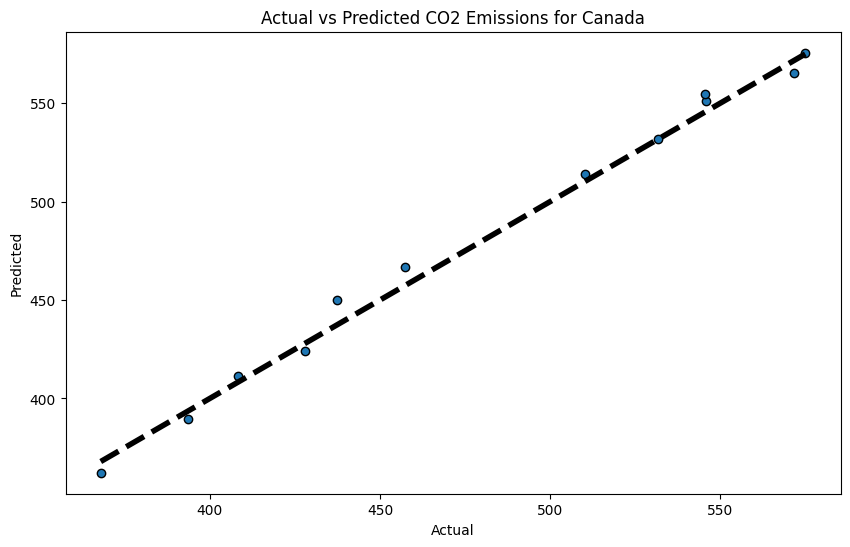

                            OLS Regression Results                            
Dep. Variable:          CO2_emissions   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6514.
Date:                Wed, 22 May 2024   Prob (F-statistic):           4.77e-56
Time:                        04:52:36   Log-Likelihood:                -219.11
No. Observations:                  46   AIC:                             446.2
Df Residuals:                      42   BIC:                             453.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          378.5384     37.782  

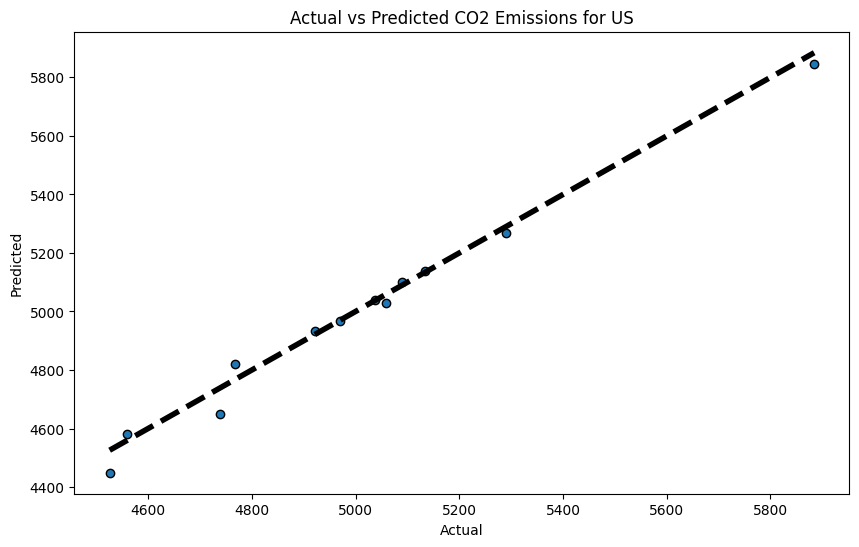

                            OLS Regression Results                            
Dep. Variable:          CO2_emissions   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.674e+04
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.21e-64
Time:                        04:52:36   Log-Likelihood:                -131.16
No. Observations:                  46   AIC:                             270.3
Df Residuals:                      42   BIC:                             277.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6680      1.779  

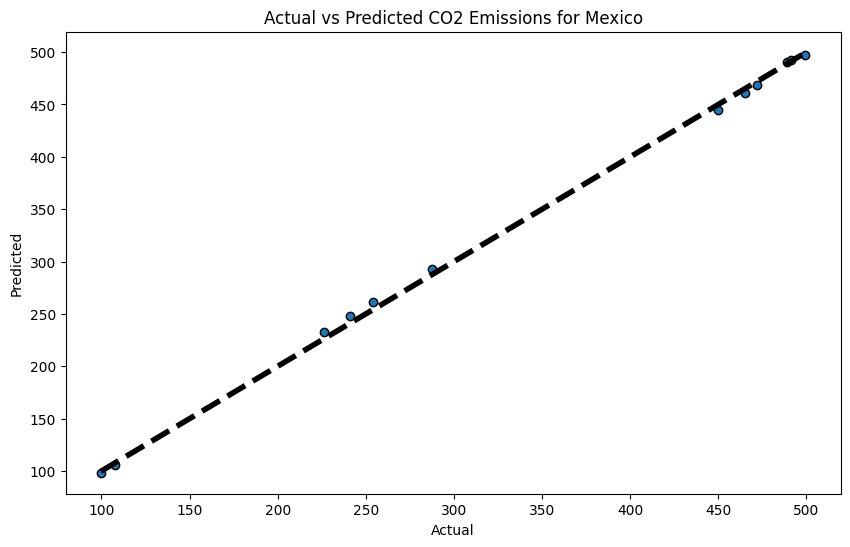

'\ncan = df.loc[df["Country"]==\'Canada\']\ncan_train = can[0:46]\nols_can = smf.ols(\'CO2 Emissions from Energy ~ Oil Consumption - EJ + Gas Consumption - EJ + Coal Consumption - EJ\', data=can_train).fit()\ncoeffs_can = ols_can.params\n#print(coeffs_can)\nprint(ols_can.summary())\n\nusa = df.loc[df["Country"] == \'United States\']\nusa_train = usa[0:46]\nusa_test = usa[46:57]\n\nols_usa = smf.ols(\'co2_emissions ~ Oil_EJ + Gas_EJ + Coal_EJ\', data=usa_train).fit()\ncoeffs_usa = ols_usa.params\n#print(coeffs_usa)\nprint(ols_usa.summary())\n\nmex = df.loc[df["Country"] == \'Mexico\']\nmex_train = mex[0:46]\nmex_test = mex[46:57]\n\nols_mex = smf.ols(\'co2_emissions ~ Oil_EJ + Gas_EJ + Coal_EJ\', data=mex_train).fit()\ncoeffs_mex = ols_mex.params\n#print(coeffs_mex)\nprint(ols_mex.summary())\n'

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def import_data() -> pd.DataFrame:
    sheet_list = [
      'CO2 Emissions from Energy',
      'Oil Consumption - EJ',
      'Gas Consumption - EJ',
      'Coal Consumption - EJ'
               ]

    combined_df = download_individual_sheet(sheet_list[0])
    for i in range(1, len(sheet_list)):
        individual_df = download_individual_sheet(sheet_list[i])
        combined_df = pd.merge(combined_df, individual_df)
    return combined_df


def download_individual_sheet(sheet: str) -> pd.DataFrame:
    path = '/content/Statistical Review of World Energy Data.xlsx'
    data = pd.read_excel(path, sheet_name = sheet, skiprows = 2, usecols = range(59))

    data.rename({data.columns[0]: 'Country'}, axis=1, inplace=True)
    data.dropna(inplace = True)

    data = data.loc[data[data.columns[0]].isin(['Mexico', 'US', 'Canada'])]

    data = data.melt(id_vars = 'Country', var_name = 'Year', value_name = sheet)
    data = data.sort_values(by=['Country', 'Year'])

    return data


df = import_data()



"""
Coding basic linear regression to examine relationship between oil, gas, and coal
consumption and total co2 emissions. Controlled for the potentially confounding
variable of Country by subsetting the dataset. Created seperate training and test
data sets. Afterwards, coded function that finds the root mean squared error between
the actual and predicted values for the test set.
"""

def ols(df: pd.DataFrame):
  df = df.rename(columns={'CO2 Emissions from Energy':'CO2_emissions', 'Oil Consumption - EJ':'oil_consumption',
                          'Gas Consumption - EJ':'gas_consumption', 'Coal Consumption - EJ':'coal_consumption'})
  countries = ["Canada" , "US", "Mexico"]

  for i in countries:
    subset = df[df["Country"] == i]
    subset_train, subset_test = train_test_split(
        subset,
        test_size = 0.2,
        random_state = 12
    )

    ols = smf.ols('CO2_emissions ~ oil_consumption + gas_consumption + coal_consumption', data=subset_train).fit()
    print(ols.summary())

    def normalized_rmse(y_true, y_pred):
      rmse = mean_squared_error(y_true, y_pred, squared = False)
      std_dev = np.std(y_true)
      nrmse = rmse / std_dev
      return nrmse

    pred = ols.predict(subset_test)
    actual = subset_test['CO2_emissions']
    print(normalized_rmse(actual, pred))
    # Plotting the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(actual, pred, edgecolors=(0, 0, 0))
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted CO2 Emissions for {i}')
    plt.show()

ols(df)



"""
can = df.loc[df["Country"]=='Canada']
can_train = can[0:46]
ols_can = smf.ols('CO2 Emissions from Energy ~ Oil Consumption - EJ + Gas Consumption - EJ + Coal Consumption - EJ', data=can_train).fit()
coeffs_can = ols_can.params
#print(coeffs_can)
print(ols_can.summary())

usa = df.loc[df["Country"] == 'United States']
usa_train = usa[0:46]
usa_test = usa[46:57]

ols_usa = smf.ols('co2_emissions ~ Oil_EJ + Gas_EJ + Coal_EJ', data=usa_train).fit()
coeffs_usa = ols_usa.params
#print(coeffs_usa)
print(ols_usa.summary())

mex = df.loc[df["Country"] == 'Mexico']
mex_train = mex[0:46]
mex_test = mex[46:57]

ols_mex = smf.ols('co2_emissions ~ Oil_EJ + Gas_EJ + Coal_EJ', data=mex_train).fit()
coeffs_mex = ols_mex.params
#print(coeffs_mex)
print(ols_mex.summary())
"""


Text(0.5, 1.0, 'CO2 Emissions from Energy from US')

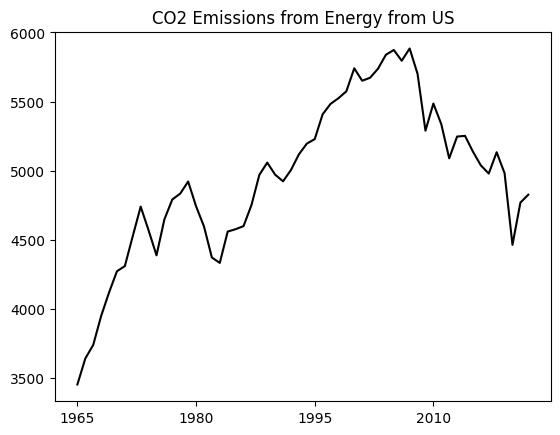

In [ ]:
us = df[df.Country == 'US']
tes = us["CO2 Emissions from Energy"]
fig, ax = plt.subplots()
tes.plot(ax=ax, color="green")
plt.xticks(np.arange(116, 173, step=15), labels=[str(15*i+1965) for i in range(4)])
ax.set_title("CO2 Emissions from Energy from US")
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions (tons)")

Text(0.5, 1.0, 'CO2 Emissions from Energy from Mexico')

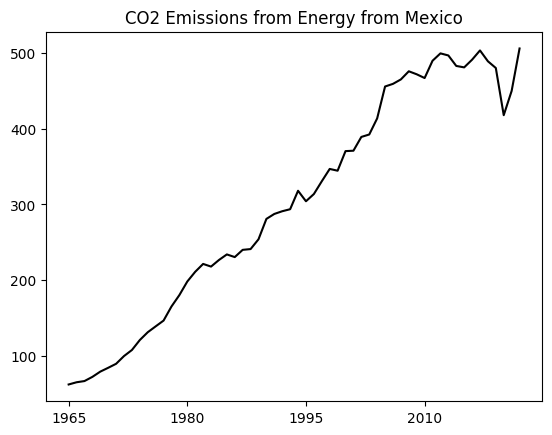

In [ ]:
mex = df[df.Country == 'Mexico']
tes = mex["CO2 Emissions from Energy"]
fig, ax = plt.subplots()
tes.plot(ax=ax, color="green")
plt.xticks(np.arange(58, 115, step=15), labels=[str(15*i+1965) for i in range(4)])
ax.set_title("CO2 Emissions from Energy from Mexico")
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions (tons)")

Text(0.5, 1.0, 'CO2 Emissions from Energy from Canada')

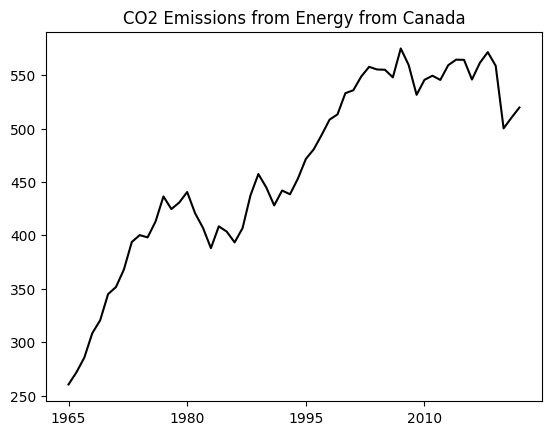

In [ ]:
can = df[df.Country == 'Canada']
tes = can["CO2 Emissions from Energy"]
fig, ax = plt.subplots()
tes.plot(ax=ax, color="green")
plt.xticks(np.arange(0, 57, step=15), labels=[str(15*i+1965) for i in range(4)])
ax.set_title("CO2 Emissions from Energy from Canada")
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions (tons)")

In [ ]:
year = {}
for i in range(58):
    year[i] = df[df.Year == i + 1965]
print(year[0])

    Country  Year  CO2 Emissions from Energy  Oil Consumption - EJ  \
0    Canada  1965                 260.328495              2.314145   
58   Mexico  1965                  62.133329              0.642414   
116      US  1965                3451.891864             23.092117   

     Gas Consumption - EJ  Coal Consumption - EJ  
0                0.780063               0.647949  
58               0.290329               0.028880  
116             14.973142              11.607279  


In [ ]:
for i in range(58):
    year[i]["TotalCO2"] = sum(year[i]["CO2 Emissions from Energy"])
print(year[57])

    Country  Year  CO2 Emissions from Energy  Oil Consumption - EJ  \
57   Canada  2022                 519.702820              4.266870   
115  Mexico  2022                 505.874678              4.118036   
173      US  2022                4825.780941             36.150043   

     Gas Consumption - EJ  Coal Consumption - EJ     TotalCO2  
57               4.378618               0.386039  5851.358439  
115              3.477085               0.251242  5851.358439  
173             31.723642               9.868398  5851.358439  


<ipython-input-12-20646e337fd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]["TotalCO2"] = sum(year[i]["CO2 Emissions from Energy"])
<ipython-input-12-20646e337fd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year[i]["TotalCO2"] = sum(year[i]["CO2 Emissions from Energy"])
<ipython-input-12-20646e337fd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
df1 = [*range(58)]
for i in range(58):
    df1[i] = year[i]["TotalCO2"].values[0]
print(df1)

[3774.353688215371, 3976.545789042022, 4090.3518239618284, 4327.796599504072, 4516.958733663429, 4700.611825984436, 4750.118165603373, 4993.480822995771, 5240.861203412525, 5088.622385833412, 4915.997645035852, 5199.315738362261, 5374.255672737024, 5423.437190706842, 5532.0817346451795, 5381.0801895461045, 5227.840536355274, 4999.397177884355, 4937.931335195899, 5193.797512006015, 5213.374886330101, 5221.943783796858, 5396.511381807504, 5647.477856856771, 5769.332377043785, 5696.132718183566, 5637.952943427954, 5737.792182386853, 5849.592198917642, 5966.509117250331, 6003.48341959808, 6201.845602059271, 6307.499273180962, 6379.259934755741, 6431.814307419583, 6644.109949229285, 6557.365223587491, 6610.055640134553, 6687.671550892846, 6807.743713870324, 6883.844987805511, 6802.304402467358, 6924.209048653953, 6736.042414170224, 6292.591939114034, 6498.159975898452, 6375.265395128168, 6134.066160039511, 6302.566082387231, 6298.973177649081, 6182.702413077466, 6074.96884450689, 6043.55877

In [ ]:
df2 = [*range(1965, 2023, 1)]

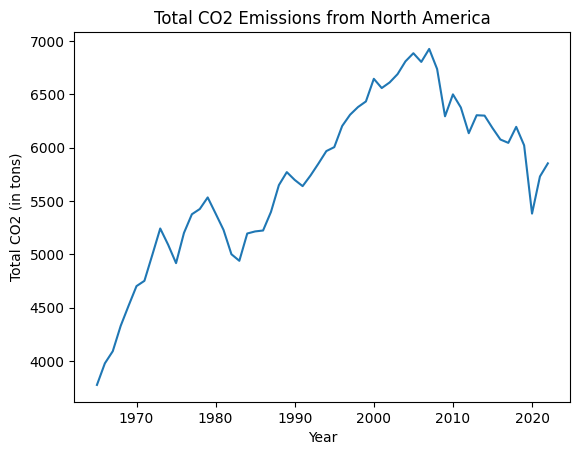

In [ ]:
plt.plot(df2, df1)
plt.title("Total CO2 Emissions from North America")
plt.xlabel('Year')
plt.ylabel('Total CO2 (in tons)')
plt.show()

## Oil Consumption

In [ ]:
usoil = df[df.Country == 'US']
tes1 = usoil["Oil Consumption - EJ"]
fig, ax = plt.subplots()
tes1.plot(ax=ax, color="cyan")
plt.xticks(np.arange(116, 173, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Oil Consumption from US")
ax.set_xlabel("Year")
ax.set_ylabel("Oil Consumption (EJ)")

In [ ]:
mexoil = df[df.Country == 'Mexico']
tes2 = mexoil["Oil Consumption - EJ"]
fig, ax = plt.subplots()
tes2.plot(ax=ax, color="cyan")
plt.xticks(np.arange(58, 115, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Oil Consumption from Mexico")
ax.set_xlabel("Year")
ax.set_ylabel("Oil Consumption (EJ)")

In [ ]:
canoil = df[df.Country == 'Canada']
tes3 = canoil["Oil Consumption - EJ"]
fig, ax = plt.subplots()
tes3.plot(ax=ax, color="cyan")
plt.xticks(np.arange(0, 57, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Oil Consumption from Canada")
ax.set_xlabel("Year")
ax.set_ylabel("Oil Consumption (EJ)")

In [ ]:
for i in range(58):
    year[i]["TotalOil"] = sum(year[i]["Oil Consumption - EJ"])
print(year[57])

In [ ]:
df3 = [*range(58)]
for i in range(58):
    df3[i] = year[i]["TotalOil"].values[0]
print(df3)

In [ ]:
plt.plot(df2, df3)
plt.title("Total Oil Consumption from North America")
plt.xlabel('Year')
plt.ylabel('Total Oil Consumption (EJ)')
plt.show()

## Coal Consumption Visualization

In [ ]:
uscoal = df[df.Country == 'US']
tes1 = us["Coal Consumption - EJ"]
fig, ax = plt.subplots()
tes1.plot(ax=ax, color="black")
plt.xticks(np.arange(116, 173, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Coal Consumption from US")
ax.set_xlabel("Year")
ax.set_ylabel("Coal Consumption (EJ)")

In [ ]:
cancoal = df[df.Country == 'Canada']
tes3 = cancoal["Coal Consumption - EJ"]
fig, ax = plt.subplots()
tes3.plot(ax=ax, color="black")
plt.xticks(np.arange(0, 57, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Coal Consumption from Canada")
ax.set_xlabel("Year")
ax.set_ylabel("Coal Consumption (EJ)")

In [ ]:
mexcoal = df[df.Country == 'Mexico']
tes2 = mexcoal["Coal Consumption - EJ"]
fig, ax = plt.subplots()
tes2.plot(ax=ax, color="black")
plt.xticks(np.arange(58, 115, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Coal Consumption from Mexico")
ax.set_xlabel("Year")
ax.set_ylabel("Coal Consumption (EJ)")

In [ ]:
for i in range(58):
    year[i]["TotalCoal"] = sum(year[i]["Coal Consumption - EJ"])
print(year[57])

In [ ]:
df4 = [*range(58)]
for i in range(58):
    df4[i] = year[i]["TotalCoal"].values[0]

In [ ]:
plt.plot(df2, df4)
plt.title("Total Coal Consumption from North America")
plt.xlabel('Year')
plt.ylabel('Total Coal Consumption (EJ)')
plt.show()

## Gas Consumption Visualization

In [ ]:
mexgas = df[df.Country == 'Mexico']
tes2 = mexgas["Gas Consumption - EJ"]
fig, ax = plt.subplots()
tes2.plot(ax=ax, color="red")
plt.xticks(np.arange(58, 115, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Gas Consumption from Mexico")
ax.set_xlabel("Year")
ax.set_ylabel("Gas Consumption (EJ)")

In [ ]:
cangas = df[df.Country == 'Canada']
tes3 = cangas["Gas Consumption - EJ"]
fig, ax = plt.subplots()
tes3.plot(ax=ax, color="red")
plt.xticks(np.arange(0, 57, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Gas Consumption from Canada")
ax.set_xlabel("Year")
ax.set_ylabel("Gas Consumption (EJ)")

In [ ]:
usgas = df[df.Country == 'US']
tes1 = usgas["Gas Consumption - EJ"]
fig, ax = plt.subplots()
tes1.plot(ax=ax, color="red")
plt.xticks(np.arange(116, 173, step=19), labels=[str(19*i+1965) for i in range(3)])
ax.set_title("Gas Consumption from US")
ax.set_xlabel("Year")
ax.set_ylabel("Gas Consumption (EJ)")

In [ ]:
for i in range(58):
    year[i]["TotalGas"] = sum(year[i]["Gas Consumption - EJ"])

In [ ]:
df5 = [*range(58)]
for i in range(58):
    df5[i] = year[i]["TotalGas"].values[0]

In [ ]:
plt.plot(df2, df5)
plt.title("Total Gas Consumption from North America")
plt.xlabel('Year')
plt.ylabel('Total Gas Consumption (EJ)')
plt.show()